In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro



In [143]:
# !pip install 
# !pip install mxnet-mkl==1.6.0 numpy==1.23.1


**Q1 A - Import ‘signal-data.csv’ as DataFrame.**

In [144]:
data = pd.read_csv("/workspaces/GreatLearning/Featurization, Model Selection & Tuning/Project/signal-data.csv")

In [145]:
data.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

**Q1 B - Print 5 point summary and share at least 2 observations.**

In [146]:
data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [147]:
data.shape

(1567, 592)

In [148]:
data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

**Observations**

*Column 0:*

Minimum value = 2746
First Quartile (Q1) = 2966 
Median (Second Quartile or Q2) = 3011 
Third Quartile (Q3)= 3056
Maxmimum value = 3356

*Column 1:*

Minimum value = 2158
First Quartile (Q1) = 2452 
Median (Second Quartile or Q2) = 2499 
Third Quartile (Q3)= 2538
Maxmimum value = 2846

*Column 588:*

Minimum value = 0.001
First Quartile (Q1) = 0.003 
Median (Second Quartile or Q2) = 0.004 
Third Quartile (Q3)= 0.006
Maxmimum value = 0.02

*Column 589:*

Minimum value = 0
First Quartile (Q1) = 44 
Median (Second Quartile or Q2) = 71 
Third Quartile (Q3)= 114
Maxmimum value = 737




**Q2 A - Write a for loop which will remove all the
features with 20%+ Null values and impute rest
with mean of the feature.**

In [149]:
for column in data.columns:

    null_percentage = data[column].isnull().sum()/len(data[column])

    if null_percentage >= 0.2:
        data.drop(column, axis=1, inplace=True)
        # print(null_percentage,column)
    else:
        if data[column].dtypes == "O":
            mode_value = data[column].mode()
            # print("Number of NaN values before filling:", data[column].isna().sum())
            data[column].fillna(mode_value, inplace=True)
            # print("Number of NaN values after filling:", data[column].isna().sum())
            # print()

        else:
            mean_value = data[column].mean()
            # print("Number of NaN values after filling:", data[column].isna().sum())
            data[column].fillna(mean_value, inplace=True)
            # print("Number of NaN values after filling:", data[column].isna().sum())
            # print()



In [150]:
data.shape

(1567, 560)

**Q2 B - Identify and drop the features which are
having same value for all the rows.**

In [151]:
features_with_same_valuie = data.columns[data.nunique() == 1]
data.drop(columns=features_with_same_valuie, inplace=True)



In [152]:
print('After dropping features having same value for all the rows (rows,columns) =',data.shape)
# data.shape

After dropping features having same value for all the rows (rows,columns) = (1567, 444)


**Q2 C - Drop other features if required using
relevant functional knowledge. Clearly justify the
same.**

In [153]:
data.drop(columns=['Time'], inplace=True)


*Dropping time columns since it won't help to predict the target column*

**Q2 D - Check for multi-collinearity in the data and
take necessary action.**

In [154]:
data.shape

(1567, 443)

In [155]:
data1=data.copy()

In [156]:
data1.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...      577     582     583     584      585       586  \
0  0.0162 -0.0034  ...  14.9509  0.5005  0.0118  0.0035   2.3630  0.021458   
1 -0.0005 -0.0148  ...  10.9003  0.5019  0.0223  0.0055   4.4447  0.009600   
2  0.0041  0.0013  ...   9.2721  0.4958  0.0157  0.0039   3.1745  0.058400   
3 -0.0124 -0.0033  ...   8.5831  0.4990  0.0103  0.0025   2.0544  0.020200   
4 -0.0031 -0.0072  ...  10.9698  0.4800  0.4766  0.1045  99.3032  0.020200   

        587       588         589  Pass/Fail  
0  0.016475  0.005283   99.670066         -1  
1  0.020100  0.006000  208.204500         -1  
2  0.048400  0.014800   82.860200          1  
3  0.014900  0.004400   73.843200         -1  
4  0.014900  0.004400   73.843200         -1  

[5 rows x 443 columns]

In [157]:

data_matrix = data1.corr().abs()
print(data_matrix)

                  0         1         2         3         4         6  \
0          1.000000  0.143840  0.004756  0.007613  0.011014  0.002270   
1          0.143840  1.000000  0.005767  0.007568  0.001636  0.025564   
2          0.004756  0.005767  1.000000  0.298935  0.095891  0.136225   
3          0.007613  0.007568  0.298935  1.000000  0.058483  0.685835   
4          0.011014  0.001636  0.095891  0.058483  1.000000  0.074368   
...             ...       ...       ...       ...       ...       ...   
586        0.018443  0.009403  0.025495  0.034711  0.043929  0.041209   
587        0.025880  0.017266  0.029345  0.039132  0.031005  0.034027   
588        0.028166  0.010118  0.030818  0.033645  0.026100  0.032227   
589        0.004174  0.044797  0.032890  0.080341  0.050910  0.043777   
Pass/Fail  0.025141  0.002603  0.000957  0.024623  0.013756  0.016239   

                  7         8         9        10  ...       577       582  \
0          0.031483  0.052622  0.009045  0.00

In [158]:
upper = data_matrix.where(np.triu(np.ones(data_matrix.shape), k=1).astype(bool))
print(upper)

            0        1         2         3         4         6         7  \
0         NaN  0.14384  0.004756  0.007613  0.011014  0.002270  0.031483   
1         NaN      NaN  0.005767  0.007568  0.001636  0.025564  0.012037   
2         NaN      NaN       NaN  0.298935  0.095891  0.136225  0.146213   
3         NaN      NaN       NaN       NaN  0.058483  0.685835  0.073856   
4         NaN      NaN       NaN       NaN       NaN  0.074368  0.347734   
...        ..      ...       ...       ...       ...       ...       ...   
586       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
587       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
588       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
589       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail NaN      NaN       NaN       NaN       NaN       NaN       NaN   

                  8         9        10  ...       577       582       583  \
0        

In [159]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print(len(to_drop),to_drop)

241 ['17', '22', '26', '27', '30', '34', '35', '36', '39', '46', '50', '51', '54', '60', '65', '66', '70', '96', '98', '101', '104', '105', '106', '123', '124', '125', '127', '130', '140', '147', '148', '152', '154', '155', '163', '164', '165', '174', '185', '187', '196', '197', '198', '199', '202', '203', '204', '205', '206', '207', '209', '224', '248', '249', '252', '254', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '367', '368', '376', '377', '386', '387', '388', '389', '390', '391',

In [160]:
data1.drop(to_drop, axis=1, inplace=True)

In [161]:
data1.shape

(1567, 202)

*We checked for the multi-collinearity in dataset and removed columns with high correlation*

Now, no. features reduced from 443 to 202


**Q2 E - Make all relevant modifications on the data
using both functional/logical
reasoning/assumptions.**

In [162]:
data1['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
-1    0.933631
 1    0.066369
Name: proportion, dtype: float64

In [163]:
data1['Pass/Fail']=data1['Pass/Fail'].replace([-1,1],[0,1])

In [164]:
data1['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
0    0.933631
1    0.066369
Name: proportion, dtype: float64

*We have modified target column , we have label encoded the target column and repaced -1 with 0 and 1 with 1*

**Q3 A - Perform a detailed univariate Analysis with
appropriate detailed comments after each
analysis.**

*Performing univariate analysis for 200+ column is diffcult but lets start with descriptive analysis*

In [165]:
#Descriptive Statisctics
descriptive_stats = data.describe().T
print(descriptive_stats.head())


    count         mean         std        min         25%        50%  \
0  1567.0  3014.452896   73.480613  2743.2400  2966.66500  3011.8400   
1  1567.0  2495.850231   80.227793  2158.7500  2452.88500  2498.9100   
2  1567.0  2200.547318   29.380932  2060.6600  2181.09995  2200.9556   
3  1567.0  1396.376627  439.712852     0.0000  1083.88580  1287.3538   
4  1567.0     4.197013   56.103066     0.6815     1.01770     1.3171   

         75%        max  
0  3056.5400  3356.3500  
1  2538.7450  2846.4400  
2  2218.0555  2315.2667  
3  1590.1699  3715.0417  
4     1.5296  1114.5366  


In [166]:
def check_distribution(row):
    # Check for normal distribution
    _, p_value = shapiro(row)
    if p_value > 0.05:
        return 'Normal'

    # Check for right-skewed distribution
    if row.skew() > 0:
        return 'Right Skewed'

    # Check for left-skewed distribution
    if row.skew() < 0:
        return 'Left Skewed'

    # Check for uniform distribution
    if (row.nunique() / len(row)) < 0.05:
        return 'Uniform'

    # Check for binomial distribution
    if (row.min() >= 0) and (row.max() <= 1) and (set(row.unique()) == {0, 1}):
        return 'Binomial'

    # If none of the above conditions are met, return 'Unknown'
    return 'Unknown'


In [182]:
data_dist = []

for i in data.columns:
    # print(i)
    data_dist.append([i,check_distribution(data[i])])

# print(set(data_dist))
data_dist = pd.DataFrame(data_dist,columns=["Feature","Distribution"])

In [183]:
data_dist["Distribution"].unique()

array(['Right Skewed', 'Left Skewed', 'Normal'], dtype=object)

*Features are gorups into three different distribution*

1.Normal Distribution

2.Left Skewed Distribution

3.Right Skewed Distribution

In [186]:
data_dist["Distribution"].value_counts()

Distribution
Right Skewed    368
Left Skewed      74
Normal            1
Name: count, dtype: int64

**Overall Distribution Insight**

No of Right skewed fearures = 368

No of left skewed feartured = 74

No of normal distributed features = 1



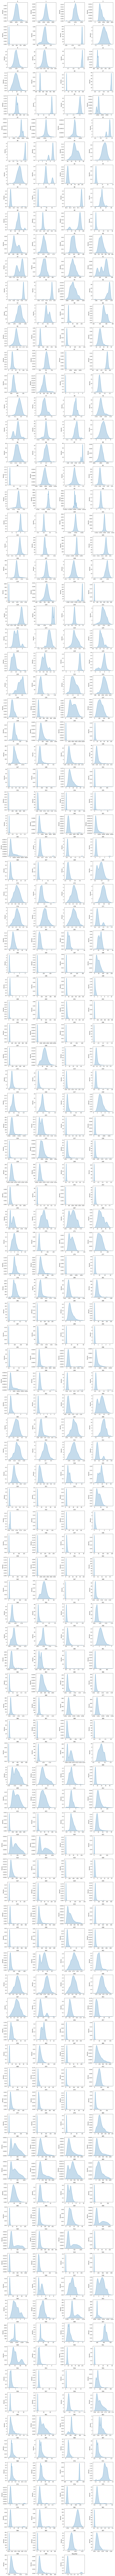

In [187]:
columns_per_row = 4
total_rows = (len(data.columns) + columns_per_row - 1) // columns_per_row
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, total_rows*3))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.kdeplot(data[column], ax=axes[i], fill=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

for j in range(len(data.columns), total_rows * columns_per_row):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()
